Task 2

>>> Завантаження даних Heart Disease...
Розмір датасету: (303, 14)
Перші 5 рядків датасету:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

--- Результати (Heart Disease Kaggle) ---
Accuracy: 0.9016

Метрики (Precision, Recall, F1):
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                   

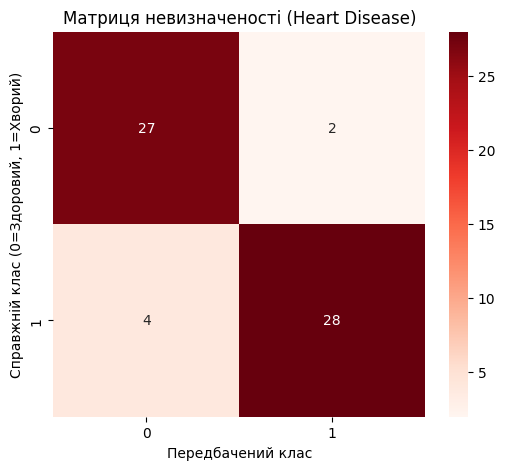

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# === КРОК 1: Завантаження та огляд ===
print(">>> Завантаження даних Heart Disease...")
df = pd.read_csv('heart.csv')

print(f"Розмір датасету: {df.shape}")
print("Перші 5 рядків датасету:")
print(df.head())

# === КРОК 2: Попередня обробка ===

# 1. Кодування категоріальних змінних
# 'cp' (chest pain), 'thal' (thalassemia), 'slope' - це категорії, хоч і цифри.
# One-Hot Encoding зробить з них окремі стовпчики.
cols_to_encode = ['cp', 'thal', 'slope']
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# 2. Визначення X та y
X = df.drop('target', axis=1)
y = df['target']

# 3. Поділ на Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Масштабування (StandardScaler)
# Це критично для Логістичної Регресії, щоб "Вік" (60) і "Холестерин" (250) мали однакову вагу.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === КРОК 3: Моделювання ===
# Використовуємо Логістичну регресію, бо це стандарт для медичних задач (ТАК/НІ)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# === КРОК 4: Оцінка результатів ===
print("\n--- Результати (Heart Disease Kaggle) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nМетрики (Precision, Recall, F1):")
print(classification_report(y_test, y_pred))

# Матриця невизначеності
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Матриця невизначеності (Heart Disease)')
plt.ylabel('Справжній клас (0=Здоровий, 1=Хворий)')
plt.xlabel('Передбачений клас')
plt.show()